## Import all necessary modules

In [1]:
import numpy as np
import pandas as pd 
# everything necessary for the statistical analysis 
import pingouin as pg
import scipy.stats as stats
from statsmodels.stats.multitest import fdrcorrection
import statsmodels.formula.api as smf
import statsmodels.api as sm
# important for plotting
import matplotlib.pyplot as plt
import seaborn as sns

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
/home/maria/miniconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## Load dataset

In [2]:
# load your excel table with all the needed information for the analysis 
data = pd.read_csv('/media/maria/Elements/Bipolife_BIDS/A1/derivatives/connectivity_matrices/subs/stattable_partialcorrelation_final.tsv', delimiter = "\t")                 

In [3]:
data

,sub,scanner,group,sex,age,ymrs,idsc,Middle_temporal_gyrus_RH_X_Ventromedial_prefrontal_cortex,Posterior_cingulate_cortex_X_Ventromedial_prefrontal_cortex,Posterior_cingulate_cortex_X_Middle_temporal_gyrus_RH,...,Hippocampus_anterior_RH_X__Pars_triangularis_RH,Hippocampus_anterior_RH_X__Superior_frontal_sulcus_anterior_LH2,Hippocampus_anterior_RH_X__Superior_frontal_sulcus_anterior_RH,Hippocampus_anterior_RH_X__Angular_gyrus_inferior_LH,Hippocampus_anterior_RH_X__Angular_gyrus_inferior_RH,Hippocampus_anterior_RH_X__Amygdala_LH,Hippocampus_anterior_RH_X__Amygdala_RH,Hippocampus_anterior_RH_X__Hippocampus_posterior_LH,Hippocampus_anterior_RH_X__Hippocampus_posterior_RH,Hippocampus_anterior_RH_X__Hippocampus_anterior_LH
0,BC01,B,1,male,29.0,0.0,7.0,0.100643,0.091842,0.017214,...,0.154628,-0.146482,0.026668,0.258933,-0.243835,-0.042882,0.012358,0.205664,-0.099312,0.189752
1,BC02,B,1,male,29.0,0.0,4.0,-0.004687,0.193546,0.009188,...,0.101544,0.191384,-0.029808,-0.031635,0.274054,0.058302,-0.006439,0.050933,0.154651,0.333206
2,BC03,B,1,female,20.0,0.0,7.0,0.025617,-0.153666,0.074608,...,0.024870,-0.246607,-0.028187,-0.071547,0.221382,0.187747,0.109672,-0.027314,0.319234,0.302386
3,BC04,B,1,female,25.0,0.0,8.0,0.266660,0.052269,0.143487,...,-0.004562,-0.076414,0.155846,0.094810,0.262270,-0.084050,0.013704,0.328977,0.158299,0.413792
4,BC05,B,1,female,21.0,0.0,4.0,-0.263986,-0.087842,-0.090361,...,-0.017641,0.160246,-0.237093,0.049388,-0.084516,0.143440,-0.026665,0.020328,0.047392,0.294934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,TR02,TUE,2,female,22.0,0.0,15.0,0.036970,0.065108,0.188403,...,0.053108,0.147527,0.151138,-0.272490,-0.105028,0.038338,-0.073904,-0.074723,0.018781,0.233328
356,TR03,TUE,3,male,23.0,4.0,14.0,-0.094007,0.020915,0.139322,...,0.080729,0.055815,-0.124827,-0.158031,0.078489,0.003749,-0.166596,-0.063737,0.004317,0.751097
357,TS03,TUE,5,female,20.0,0.0,8.0,-0.113868,0.226948,0.203391,...,0.131485,-0.002585,0.061780,0.065400,-0.002834,0.029733,0.186177,0.028419,0.149475,0.204508
358,TS04,TUE,5,male,26.0,2.0,0.0,0.085807,-0.139296,0.176873,...,0.093797,0.155410,0.089063,0.055008,-0.195665,-0.127932,-0.219593,0.061078,0.217678,0.408282


## Calculating the pvalues for the effect group for every connection with an OLS regression and sorting them by significance to find the most important ones

In [4]:
# create a datframe for all pvalues, for multiple correction 
pval_df = pd.DataFrame(columns = ['connection','pvalue'])
#create a dataframe of the most significant connections
sign_pval_df = pd.DataFrame(columns = ['connection','coef','std err','pvalue','0.025','0.975'])

# loop over all possible connections and ignore the first 7 entries (demographical data)
for connection in data.columns[7:]:
    
    sign_pval = []
    pval_list = []
    
    # calculate the OLS regression, forumlar is based on R
    model = smf.ols(f"{connection} ~ 1 + group + sex + group:sex ", data=data)
    results = model.fit()
    
    # add connection and pvalue to the general list 
    pval_list.extend([connection, results.pvalues['group']])
    pval_df.loc[len(pval_df)] = pval_list
    
    # include the results of the most significant connections in a separate table 
    if (results.pvalues['group'] < 0.01) == True:
        
        # to get the intervall from the results 
        intervalls = results.conf_int()
        sign_pval.extend([connection, results.params['group'], results.bse['group'], results.pvalues['group'], intervalls.iloc[2][0], intervalls.iloc[2][1]])
        sign_pval_df.loc[len(sign_pval_df)] = sign_pval

In [5]:
# check if any pvalue survives the correction for multiple comparison
from statsmodels.stats.multitest import multipletests
multipletests(pval_df['pvalue'], alpha=0.05, method='fdr_bh', returnsorted = True)[:2]
# if 'false' is shown the pvalue does not survive the correction 

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
      

In [6]:
# sort the table from most to least significant
sign_pval_df = sign_pval_df.sort_values('pvalue') # nominale p-werte, nicht adjustiert

# save the values as a tsv file to have them separately 
#sign_pval_df.to_csv('/media/sf_shared_VB/MA_results/signcons_ols.tsv', sep='\t', index=False)  

# create a list of the names of the most significant connections 
significant_cons = list(sign_pval_df['connection'])
significant_cons 

['Superior_frontal_sulcus_anterior_RH_X__Superior_frontal_sulcus_RH',
 'Hippocampus_anterior_RH_X__Superior_frontal_sulcus_anterior_RH',
 'Thalamus_X__Superior_frontal_sulcus_anterior_LH',
 'Hippocampus_posterior_LH_X_Dorsomedial_prefrontal_cortex_anteromedial',
 'Posterior_cingulate_cortex_X_Ventromedial_prefrontal_cortex',
 'Superior_frontal_sulcus_anterior_RH_X_Posterior_cingulate_cortex']

### Calculating the OLS regression again for the connections with the most significant effect of group and check if the dependent variable has to be rank transformed by looking at the resiudal plots
#### if the plot of residuals shows outliers data has to be rank transformed 

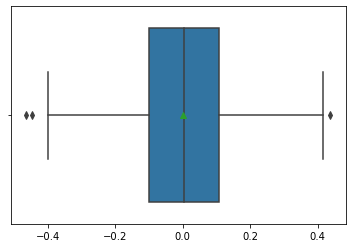

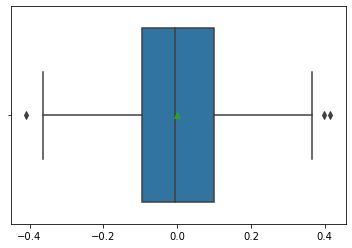

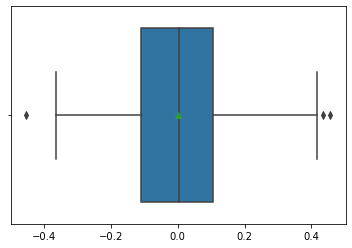

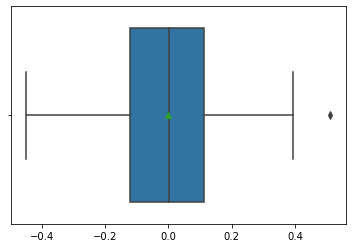

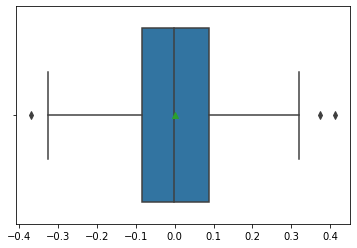

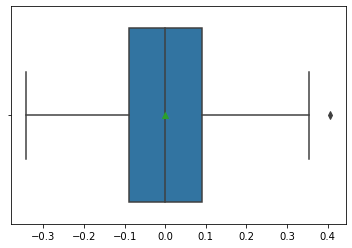

In [40]:
for connection in significant_cons:

    model = smf.ols(f"{connection} ~ 1 + group + sex + group:sex ", data=data)
    results = model.fit()
    # plot the residuals
    sns.boxplot(x=results.resid, showmeans=True);
    plt.show()

### Creating a new dataframe with the rank transformed values 

In [41]:
# create the columns of the table 
rank_columns = ['sub','group','sex'] # add necessary data 
rank_columns.extend(significant_cons) # add all the significant connections
# fill the columns with the associated values from the original data 
data_rank = data[rank_columns]
# data_rank

# enter the ranked data into the table 
for cons in data_rank.columns[3:]: # ignore the first 3 columns
    #rank the data 
    ranking = stats.rankdata(data_rank[cons])# possibilities = ‘average’, ‘min’, ‘max’, ‘first’, ‘dense’, average is default
    data_rank[f'{cons}_rank'] = ranking
data_rank

<ipython-input-41-dc21ea0f3d5d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rank[f'{cons}_rank'] = ranking


,sub,group,sex,Superior_frontal_sulcus_anterior_RH_X__Superior_frontal_sulcus_RH,Hippocampus_anterior_RH_X__Superior_frontal_sulcus_anterior_RH,Thalamus_X__Superior_frontal_sulcus_anterior_LH,Hippocampus_posterior_LH_X_Dorsomedial_prefrontal_cortex_anteromedial,Posterior_cingulate_cortex_X_Ventromedial_prefrontal_cortex,Superior_frontal_sulcus_anterior_RH_X_Posterior_cingulate_cortex,Superior_frontal_sulcus_anterior_RH_X__Superior_frontal_sulcus_RH_rank,Hippocampus_anterior_RH_X__Superior_frontal_sulcus_anterior_RH_rank,Thalamus_X__Superior_frontal_sulcus_anterior_LH_rank,Hippocampus_posterior_LH_X_Dorsomedial_prefrontal_cortex_anteromedial_rank,Posterior_cingulate_cortex_X_Ventromedial_prefrontal_cortex_rank,Superior_frontal_sulcus_anterior_RH_X_Posterior_cingulate_cortex_rank
0,BC01,1,male,0.288809,0.026668,0.224566,-0.121867,0.091842,0.032397,276.0,199.0,337.0,93.0,257.0,188.0
1,BC02,1,male,0.242484,-0.029808,-0.208517,-0.101507,0.193546,-0.083059,241.0,146.0,56.0,107.0,330.0,69.0
2,BC03,1,female,0.170429,-0.028187,-0.074833,0.115270,-0.153666,0.057653,178.0,147.0,137.0,273.0,34.0,217.0
3,BC04,1,female,-0.155147,0.155846,0.032468,-0.148228,0.052269,-0.075239,8.0,295.0,236.0,77.0,218.0,77.0
4,BC05,1,female,0.221870,-0.237093,0.217985,-0.028766,-0.087842,0.272624,224.0,19.0,331.0,162.0,73.0,350.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,TR02,2,female,0.059932,0.151138,0.036674,0.029401,0.065108,-0.233055,93.0,292.0,240.0,211.0,229.0,8.0
356,TR03,3,male,0.058147,-0.124827,-0.034462,-0.093496,0.020915,-0.317652,92.0,68.0,177.0,117.0,185.0,1.0
357,TS03,5,female,0.281419,0.061780,-0.288533,0.149860,0.226948,-0.075431,270.0,233.0,17.0,291.0,340.0,76.0
358,TS04,5,male,0.310172,0.089063,-0.005433,0.117157,-0.139296,-0.131679,291.0,257.0,208.0,274.0,43.0,41.0


In [11]:
# same procedure as before to get the pvalues and other measures from the OLS regression but this time based on the rank transformed data 
#create a dataframe of the most significant connections
sign_pval_rank_df = pd.DataFrame(columns = ['connection','coef','std err','pvalue','0.025','0.975'])

# loop over all possible connections and ignore the first 3 entries (demographical data)
for connection in data_rank.columns[3:]:
    if ('rank' in connection) ==  True: # to only get the ranked columns
    
        sign_pval = []

        model = smf.ols(f"{connection} ~ 1 + group + sex + group:sex ", data=data_rank)
        results = model.fit()
    
        # to get the intervall from the results 
        intervalls = results.conf_int()
        sign_pval.extend([connection, results.params['group'], results.bse['group'], results.pvalues['group'], intervalls.iloc[2][0], intervalls.iloc[2][1]])
        sign_pval_rank_df.loc[len(sign_pval_rank_df)] = sign_pval
        
# save the values as a tsv file to have them separately 
sign_pval_rank_df.to_csv('/media/sf_shared_VB/MA_results/ranked_signcons_ols.tsv', sep='\t', index=False)  

In [12]:
sign_pval_rank_df

,connection,coef,std err,pvalue,0.025,0.975
0,Superior_frontal_sulcus_anterior_RH_X__Superio...,21.882877,6.846232,0.001516,8.418736,35.347018
1,Hippocampus_anterior_RH_X__Superior_frontal_su...,19.886499,6.864147,0.003999,6.387124,33.385873
2,Thalamus_X__Superior_frontal_sulcus_anterior_L...,-19.724830,6.784630,0.003874,-33.067823,-6.381837
3,Hippocampus_posterior_LH_X_Dorsomedial_prefron...,19.128205,6.863427,0.005605,5.630247,32.626163
4,Posterior_cingulate_cortex_X_Ventromedial_pref...,20.221788,6.851907,0.003374,6.746485,33.697090
5,Superior_frontal_sulcus_anterior_RH_X_Posterio...,-19.232870,6.858477,0.005320,-32.721094,-5.744646


## Plotting the most significant correlations 

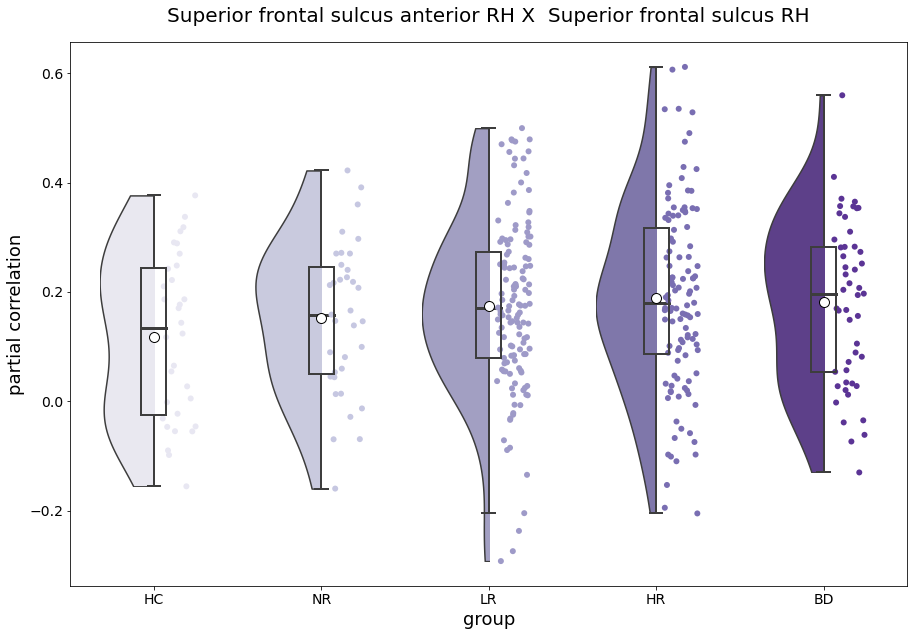

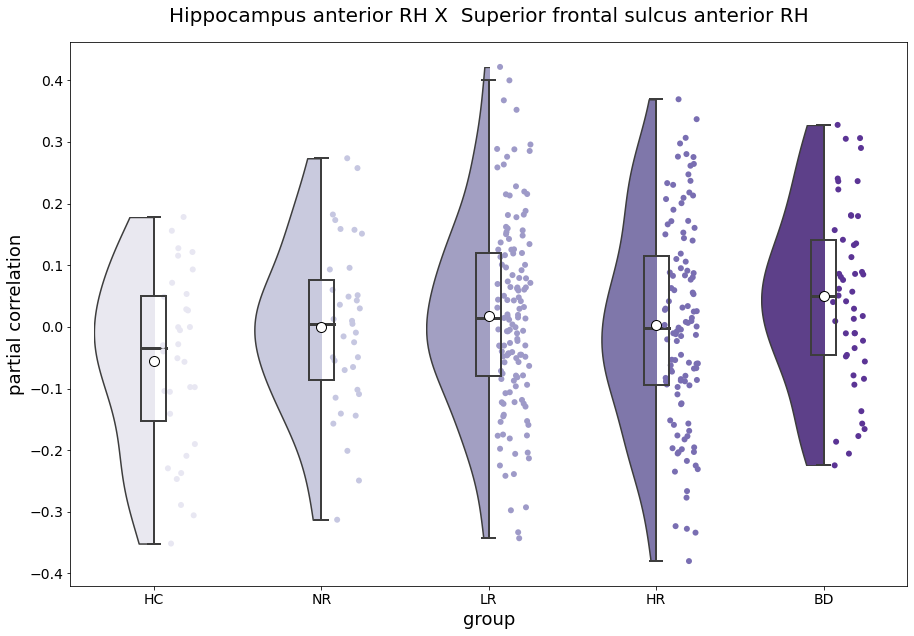

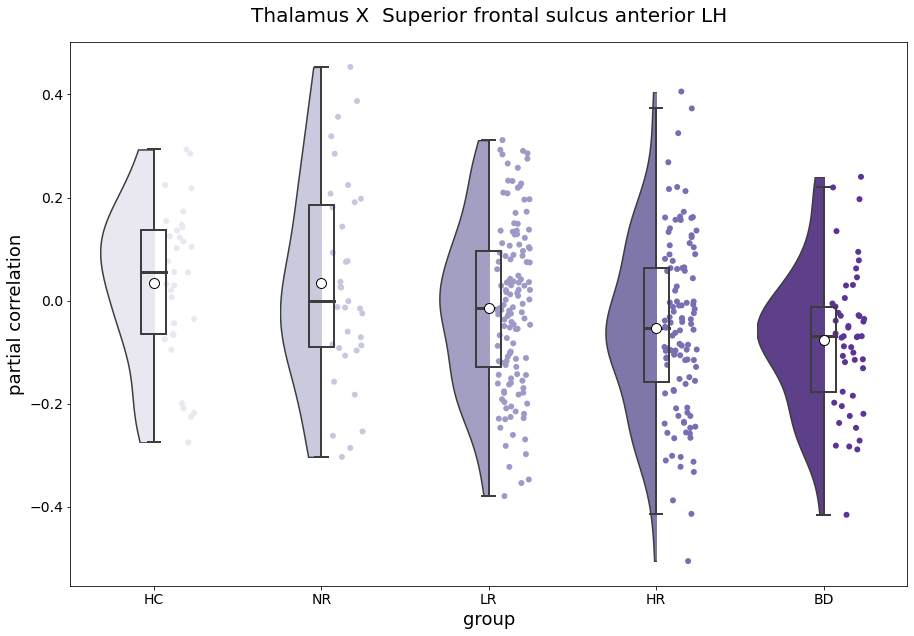

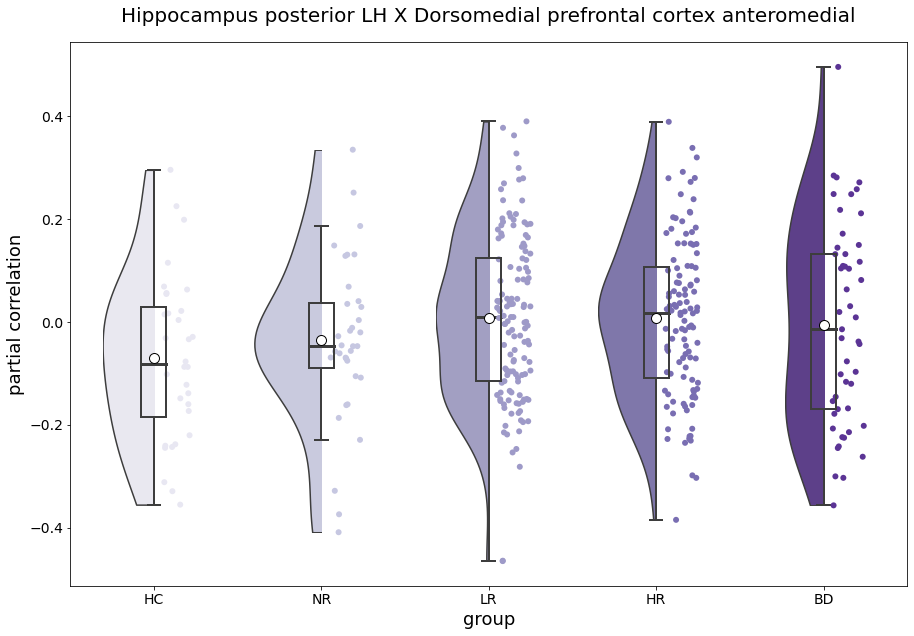

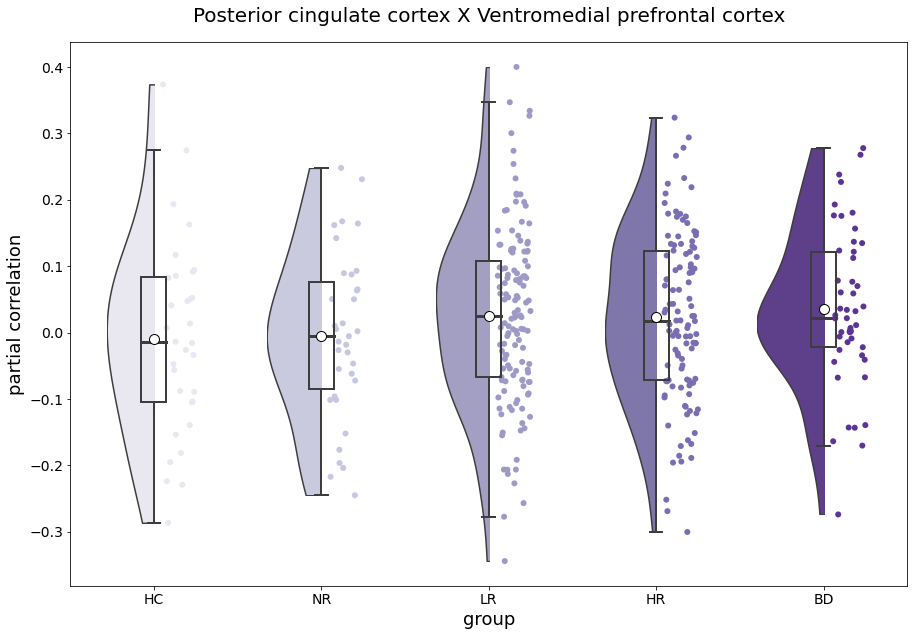

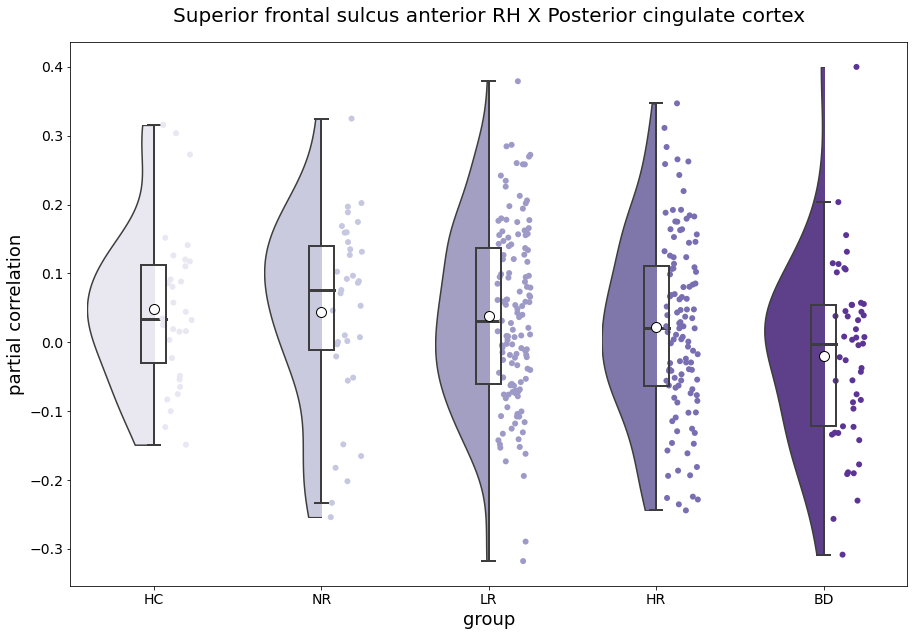

In [28]:
# loop to create a plot for every significant connection (p < 0.01)
for connection in data_rank.columns[3:]:
    if ('rank' in connection) ==  False: # to not get the ranked columns
    
        plt.figure(figsize=(15, 10))

        # Create violin plots without mini-boxplots inside.
        ax = sns.violinplot(x='group', y=connection, data=data_rank, 
                            order=[1,2,3,4,5], cut = 0, palette='Purples',  inner=None)

        # Clip the lower half of each violin.
        for item in ax.collections:
            x0, y0, width, height = item.get_paths()[0].get_extents().bounds
            item.set_clip_path(plt.Rectangle((x0, y0), width/2, height,
                               transform=ax.transData))

        # Create strip plots with partially transparent points of different colors depending on the group.
        num_items = len(ax.collections)
        sns.stripplot(x='group', y=connection, 
                      data=data_rank, order=[1,2,3,4,5], 
                      palette = 'Purples',
                      alpha=1, size=6)

        # Shift each strip plot strictly below the correponding volin.
        for item in ax.collections[num_items:]:
            item.set_offsets(item.get_offsets() + [0.15,0])

        # Create narrow boxplots on top of the corresponding violin and strip plots, with thick lines, the mean values, without the outliers.
        sns.boxplot(x='group', y=connection, data=data_rank, order=[1,2,3,4,5], 
                    width=0.15, showfliers=False, showmeans=True, 
                    meanprops=dict(marker = 'o', markerfacecolor='white', markeredgecolor="black", 
                                   markersize=10, zorder=3),
                    boxprops=dict(facecolor=(0,0,0,0), 
                                  linewidth=2, zorder=3),
                    whiskerprops=dict(linewidth=2),
                    capprops=dict(linewidth=2),
                    medianprops=dict(linewidth=3))

        plt.title(connection.replace('_',' '), fontsize = 20, pad = 20)
        ax.set_xlabel('group', fontsize=18)
        ax.set_ylabel('partial correlation', fontsize=18)
        ax.set_xticklabels(['HC','NR','LR','HR','BD'])
        plt.yticks(fontsize = 14)
        plt.xticks(fontsize = 14)
        plt.savefig(f'/media/sf_shared_VB/MA_results/{connection}_plot.png', bbox_inches = 'tight', pad_inches = 0.2)

## Calculate the OLS for the most significant connections and check for interactions (rank transformed data)

In [17]:
# dataframe for sign connections with sex differences 
sexdif_rank_df = pd.DataFrame(columns = ['connection','coef','std err','pvalue','0.025','0.975'])
sexdif_cons = []

for connection in data_rank.columns[3:]:
    if ('rank' in connection) ==  True: # to only get the ranked columns
        
        sexdif_vals = []
        
        model = smf.ols(f"{connection} ~ 1 + group + sex + group:sex ", data=data_rank)
        results = model.fit()
        if results.pvalues['group:sex[T.male]'] < 0.01:
            
            # to get the intervall from the results 
            intervalls = results.conf_int()
            sexdif_vals.extend([connection, results.params['group:sex[T.male]'], results.bse['group:sex[T.male]'], results.pvalues['group:sex[T.male]'], intervalls.iloc[3][0], intervalls.iloc[3][1]])
            sexdif_rank_df.loc[len(sexdif_rank_df)] = sexdif_vals
            
            sexdif_cons.append(connection)
            print(connection, results.pvalues['group:sex[T.male]'])
            
# save the values as a tsv file to have them separately 
sexdif_rank_df.to_csv('/media/sf_shared_VB/MA_results/ranked_sexdif_ols.tsv', sep='\t', index=False) 

Superior_frontal_sulcus_anterior_RH_X__Superior_frontal_sulcus_RH_rank 0.009995918694404785


## Separate the data according to sex and calculate the OLS regression for both sexes¶
#### female participants

In [18]:
# data including only females
data_female = data_rank[data_rank.sex != 'male']

# drop the old ranks because they are based on the overall data and not on the specific sex 
old_ranks = ['Superior_frontal_sulcus_anterior_RH_X__Superior_frontal_sulcus_RH_rank',
       'Hippocampus_anterior_RH_X__Superior_frontal_sulcus_anterior_RH_rank',
       'Thalamus_X__Superior_frontal_sulcus_anterior_LH_rank',
       'Hippocampus_posterior_LH_X_Dorsomedial_prefrontal_cortex_anteromedial_rank',
       'Posterior_cingulate_cortex_X_Ventromedial_prefrontal_cortex_rank',
       'Superior_frontal_sulcus_anterior_RH_X_Posterior_cingulate_cortex_rank']

data_female.drop(old_ranks, inplace = True, axis = 1)

for cons in data_female.columns[3:]: # ignore the first 3 columns
    
    #rank the data 
    ranking = stats.rankdata(data_female[cons])# possibilities = ‘average’, ‘min’, ‘max’, ‘first’, ‘dense’, average is default
    # create new columns for the ranked data 
    data_female[f'{cons}_rank'] = ranking

data_female

/home/maria/.local/lib/python3.8/site-packages/pandas/core/frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-18-0fbe6d1863ac>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_female[f'{cons}_rank'] = ranking


,sub,group,sex,Superior_frontal_sulcus_anterior_RH_X__Superior_frontal_sulcus_RH,Hippocampus_anterior_RH_X__Superior_frontal_sulcus_anterior_RH,Thalamus_X__Superior_frontal_sulcus_anterior_LH,Hippocampus_posterior_LH_X_Dorsomedial_prefrontal_cortex_anteromedial,Posterior_cingulate_cortex_X_Ventromedial_prefrontal_cortex,Superior_frontal_sulcus_anterior_RH_X_Posterior_cingulate_cortex,Superior_frontal_sulcus_anterior_RH_X__Superior_frontal_sulcus_RH_rank,Hippocampus_anterior_RH_X__Superior_frontal_sulcus_anterior_RH_rank,Thalamus_X__Superior_frontal_sulcus_anterior_LH_rank,Hippocampus_posterior_LH_X_Dorsomedial_prefrontal_cortex_anteromedial_rank,Posterior_cingulate_cortex_X_Ventromedial_prefrontal_cortex_rank,Superior_frontal_sulcus_anterior_RH_X_Posterior_cingulate_cortex_rank
2,BC03,1,female,0.170429,-0.028187,-0.074833,0.115270,-0.153666,0.057653,92.0,75.0,67.0,134.0,16.0,105.0
3,BC04,1,female,-0.155147,0.155846,0.032468,-0.148228,0.052269,-0.075239,4.0,149.0,119.0,38.0,116.0,41.0
4,BC05,1,female,0.221870,-0.237093,0.217985,-0.028766,-0.087842,0.272624,115.0,13.0,171.0,82.0,40.0,178.0
6,BC07,1,female,0.177004,0.121369,0.143087,-0.328668,0.047372,-0.099992,99.0,135.0,157.0,3.0,113.0,30.0
7,BC08,1,female,-0.097863,0.028446,-0.066495,0.056450,-0.089225,0.141102,8.0,100.0,68.0,119.0,38.0,146.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,TD07,3,female,0.185510,0.116226,-0.054496,0.053686,0.121884,-0.002982,102.0,133.0,72.0,118.0,144.0,71.0
353,TF02,5,female,0.215949,0.086000,-0.223611,0.284742,0.032291,0.107691,112.0,122.0,24.0,174.0,107.0,133.0
354,TF03,5,female,0.365021,-0.034428,-0.040561,-0.223591,0.058985,-0.190128,162.0,72.0,79.0,15.0,120.0,10.0
355,TR02,2,female,0.059932,0.151138,0.036674,0.029401,0.065108,-0.233055,52.0,146.0,123.0,103.0,121.0,5.0


#### male participants

In [19]:
# data including only males 
data_male = data_rank[data_rank.sex != 'female']

# drop the old ranks because they are based on the overall data and not on the specific sex 
old_ranks = ['Superior_frontal_sulcus_anterior_RH_X__Superior_frontal_sulcus_RH_rank',
       'Hippocampus_anterior_RH_X__Superior_frontal_sulcus_anterior_RH_rank',
       'Thalamus_X__Superior_frontal_sulcus_anterior_LH_rank',
       'Hippocampus_posterior_LH_X_Dorsomedial_prefrontal_cortex_anteromedial_rank',
       'Posterior_cingulate_cortex_X_Ventromedial_prefrontal_cortex_rank',
       'Superior_frontal_sulcus_anterior_RH_X_Posterior_cingulate_cortex_rank']

data_male.drop(old_ranks, inplace = True, axis = 1)

for cons in data_male.columns[3:]: # ignore the first 3 columns
    
    #rank the data 
    ranking = stats.rankdata(data_male[cons])# possibilities = ‘average’, ‘min’, ‘max’, ‘first’, ‘dense’, average is default
    # create new columns for the ranked data 
    data_male[f'{cons}_rank'] = ranking

data_male

/home/maria/.local/lib/python3.8/site-packages/pandas/core/frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-19-5954c3e183b3>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_male[f'{cons}_rank'] = ranking


,sub,group,sex,Superior_frontal_sulcus_anterior_RH_X__Superior_frontal_sulcus_RH,Hippocampus_anterior_RH_X__Superior_frontal_sulcus_anterior_RH,Thalamus_X__Superior_frontal_sulcus_anterior_LH,Hippocampus_posterior_LH_X_Dorsomedial_prefrontal_cortex_anteromedial,Posterior_cingulate_cortex_X_Ventromedial_prefrontal_cortex,Superior_frontal_sulcus_anterior_RH_X_Posterior_cingulate_cortex,Superior_frontal_sulcus_anterior_RH_X__Superior_frontal_sulcus_RH_rank,Hippocampus_anterior_RH_X__Superior_frontal_sulcus_anterior_RH_rank,Thalamus_X__Superior_frontal_sulcus_anterior_LH_rank,Hippocampus_posterior_LH_X_Dorsomedial_prefrontal_cortex_anteromedial_rank,Posterior_cingulate_cortex_X_Ventromedial_prefrontal_cortex_rank,Superior_frontal_sulcus_anterior_RH_X_Posterior_cingulate_cortex_rank
0,BC01,1,male,0.288809,0.026668,0.224566,-0.121867,0.091842,0.032397,137.0,101.0,164.0,49.0,124.0,98.0
1,BC02,1,male,0.242484,-0.029808,-0.208517,-0.101507,0.193546,-0.083059,119.0,72.0,29.0,56.0,162.0,34.0
5,BC06,1,male,0.337348,-0.097737,0.146907,-0.159591,-0.105019,0.029080,151.0,36.0,148.0,30.0,31.0,95.0
8,BC09,1,male,0.186457,-0.050850,0.006859,0.198874,0.274485,-0.064725,91.0,61.0,111.0,160.0,171.0,42.0
9,BC10,1,male,0.065400,-0.000527,0.054791,-0.354777,-0.181215,-0.048665,42.0,87.0,121.0,5.0,15.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,TD03,3,male,0.163971,-0.019580,0.086626,0.082353,0.087121,0.007593,81.0,76.0,129.0,129.0,120.0,83.0
349,TD04,4,male,0.343211,-0.182537,0.061473,0.100287,-0.075720,-0.193094,152.0,15.0,123.0,134.0,37.0,8.0
356,TR03,3,male,0.058147,-0.124827,-0.034462,-0.093496,0.020915,-0.317652,41.0,30.0,93.0,59.0,87.0,1.0
358,TS04,5,male,0.310172,0.089063,-0.005433,0.117157,-0.139296,-0.131679,145.0,134.0,107.0,140.0,21.0,22.0


In [20]:
# dataframe for sign connections with sex differences 
sexdif_comparison_df = pd.DataFrame(columns = ['connection','coef_f','std_err_f','pvalue_f','0.025_f','0.975_f','coef_m','std_err_m','pvalue_m','0.025_m','0.975_m'])

for connection in sexdif_cons: # to only get connections showing sex differences 
    if ('rank' in connection) ==  True: # to only get the ranked columns
        
        sexdif_vals = []
        
        # female
        model_f = smf.ols(f"{connection} ~ 1 + group", data=data_female)
        results_f = model_f.fit()
        # male
        model_m = smf.ols(f"{connection} ~ 1 + group", data=data_male)
        results_m = model_m.fit()
        
        # to get the intervall from the results 
        intervalls_f = results_f.conf_int()
        intervalls_m = results_m.conf_int()
        
        sexdif_vals.extend([connection, results_f.params['group'], results_f.bse['group'], results_f.pvalues['group'], intervalls_f.iloc[1][0], intervalls_f.iloc[1][1], results_m.params['group'], results_m.bse['group'], results_m.pvalues['group'], intervalls_m.iloc[1][0], intervalls_m.iloc[1][1]])
        sexdif_comparison_df.loc[len(sexdif_comparison_df)] = sexdif_vals
            
            
# save the values as a tsv file to have them separately 
sexdif_comparison_df.to_csv('/media/sf_shared_VB/MA_results/comparison_sexdif_ols.tsv', sep='\t', index=False) 

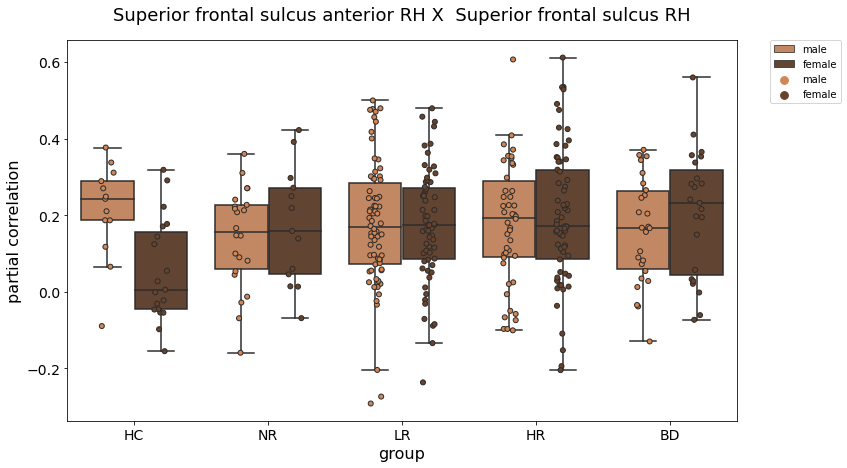

In [29]:
# plot the sex differences 
for connection in sexdif_cons:
    
    #to get the partial correlation and not the rank 
    connection = connection[:-5]
    
    plt.figure(figsize=(12, 7))
    
    #stripplot
    ax = sns.stripplot(x="group", y=connection, hue="sex",
    data=data_rank, jitter=True,
    palette="copper_r", dodge=True,linewidth=1,edgecolor='gray')
    
    #boxplot
    sns.boxplot(x="group", y=connection, hue="sex",
    data=data_rank, palette="copper_r",fliersize=0)

    # costumize the legend, fontsizes, labels, title
    plt.title(connection.replace('_',' '), fontsize = 18, pad = 20)
    ax.set_xlabel('group', fontsize=16)
    ax.set_ylabel('partial correlation', fontsize=16)
    ax.set_xticklabels(['HC','NR','LR','HR','BD'])
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.savefig(f'/media/sf_shared_VB/MA_results/{connection}_sexdif_plot.png', bbox_inches = 'tight')

### Check connections between Amy and PFC

In [30]:
# list containing only the connections between Amy and PFC
amy_list = ['Amygdala_LH_X_Ventromedial_prefrontal_cortex', 'Amygdala_LH_X__Ventromedial_prefrontal_cortex_anterior', 'Amygdala_LH_X_Dorsomedial_prefrontal_cortex_antero_superior','Amygdala_LH_X_Dorsomedial_prefrontal_cortex_anteromedial',
'Amygdala_RH_X_Ventromedial_prefrontal_cortex', 'Amygdala_RH_X__Ventromedial_prefrontal_cortex_anterior', 'Amygdala_RH_X_Dorsomedial_prefrontal_cortex_antero_superior', 'Amygdala_RH_X_Dorsomedial_prefrontal_cortex_anteromedial']


In [32]:
#create a dataframe of the most significant connections
amy_pval_df = pd.DataFrame(columns = ['connection','coef','std err','pvalue','0.025','0.975'])

# loop over all possible connections and ignore the first 7 entries (demographical data)
for connection in amy_list:
    
    sign_pval = []
    
    model = smf.ols(f"{connection} ~ 1 + group + sex + group:sex ", data=data)
    results = model.fit()
        
    # to get the intervall from the results 
    intervalls = results.conf_int()
    sign_pval.extend([connection, results.params['group'], results.bse['group'], results.pvalues['group'], intervalls.iloc[2][0], intervalls.iloc[2][1]])
    amy_pval_df.loc[len(amy_pval_df)] = sign_pval

In [33]:
amy_pval_df

,connection,coef,std err,pvalue,0.025,0.975
0,Amygdala_LH_X_Ventromedial_prefrontal_cortex,0.015938,0.009259,0.086048,-0.002271,0.034147
1,Amygdala_LH_X__Ventromedial_prefrontal_cortex_...,-0.011421,0.008603,0.185209,-0.028340,0.005499
2,Amygdala_LH_X_Dorsomedial_prefrontal_cortex_an...,-0.014498,0.008069,0.073233,-0.030368,0.001371
3,Amygdala_LH_X_Dorsomedial_prefrontal_cortex_an...,0.021183,0.010085,0.036398,0.001349,0.041017
4,Amygdala_RH_X_Ventromedial_prefrontal_cortex,-0.000913,0.009895,0.926547,-0.020373,0.018547
5,Amygdala_RH_X__Ventromedial_prefrontal_cortex_...,0.004275,0.008912,0.631732,-0.013252,0.021803
6,Amygdala_RH_X_Dorsomedial_prefrontal_cortex_an...,0.002587,0.008927,0.772161,-0.014969,0.020143
7,Amygdala_RH_X_Dorsomedial_prefrontal_cortex_an...,-0.006150,0.009988,0.538472,-0.025794,0.013494


### Rank transformation

In [34]:
# create the columns of the table 
amy_columns = ['sub','group','sex'] # add necessary data 
amy_columns.extend(amy_list) # add all the significant connections
# fill the columns with the associated values from the original data 
amy_rank = data[amy_columns]

In [35]:
for cons in amy_rank.columns[3:]: # ignore the first 3 columns
    
    #rank the data 
    ranking = stats.rankdata(amy_rank[cons])# possibilities = ‘average’, ‘min’, ‘max’, ‘first’, ‘dense’, average is default
    # create new columns for the ranked data 
    amy_rank[f'{cons}_rank'] = ranking

<ipython-input-35-2e27b9ec1c75>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amy_rank[f'{cons}_rank'] = ranking


In [36]:
#create a dataframe of the most significant connections
rank_amy_pval_df = pd.DataFrame(columns = ['connection','coef','std err','pvalue','0.025','0.975'])

# loop over all possible connections and ignore the first 7 entries (demographical data)
for connection in amy_rank[3:]:
    if ('rank' in connection) ==  True:
        
        sign_pval = []

        model = smf.ols(f"{connection} ~ 1 + group + sex + group:sex ", data=amy_rank)
        results = model.fit()

        # to get the intervall from the results 
        intervalls = results.conf_int()
        sign_pval.extend([connection, results.params['group'], results.bse['group'], results.pvalues['group'], intervalls.iloc[2][0], intervalls.iloc[2][1]])
        rank_amy_pval_df.loc[len(rank_amy_pval_df)] = sign_pval
        
rank_amy_pval_df.to_csv('/media/sf_shared_VB/MA_results/ranked_amy_ols.tsv', sep='\t', index=False) 

In [37]:
rank_amy_pval_df

,connection,coef,std err,pvalue,0.025,0.975
0,Amygdala_LH_X_Ventromedial_prefrontal_cortex_rank,11.959800,6.868221,0.082491,-1.547587,25.467187
1,Amygdala_LH_X__Ventromedial_prefrontal_cortex_...,-7.486310,6.919901,0.280050,-21.095333,6.122712
2,Amygdala_LH_X_Dorsomedial_prefrontal_cortex_an...,-11.021440,6.920964,0.112166,-24.632555,2.589675
3,Amygdala_LH_X_Dorsomedial_prefrontal_cortex_an...,11.490946,6.919683,0.097671,-2.117648,25.099540
4,Amygdala_RH_X_Ventromedial_prefrontal_cortex_rank,2.052876,6.922905,0.766995,-11.562056,15.667807
5,Amygdala_RH_X__Ventromedial_prefrontal_cortex_...,3.585687,6.862152,0.601626,-9.909763,17.081138
6,Amygdala_RH_X_Dorsomedial_prefrontal_cortex_an...,-1.085615,6.929857,0.875603,-14.714218,12.542988
7,Amygdala_RH_X_Dorsomedial_prefrontal_cortex_an...,-4.031073,6.870129,0.557741,-17.542212,9.480065
